In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


19:57:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=497513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=567382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=204465;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=808613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

19:57:12 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=385809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=381456;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

19:57:12 INFO      Starting 3ML!                                                                     ]8;id=429842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=618707;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=343269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=705253;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=115170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=398485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=315732;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=694904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=546096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=901566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

19:57:13 WARNING   PyGMO is not available                                                      ]8;id=390509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=777204;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

19:57:13 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=565383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=430338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=388695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=402101;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=157867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=106384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=844421;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=816499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Yourlib init successful!!!


In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



19:58:57 INFO      Creating singleton for                                                            ]8;id=170783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=508345;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA0.91/Standard/src/../../data/DR_ihep_MK2.root                      

19:59:01 INFO      Region of Interest:                                                                   ]8;id=249820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=703598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=475110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=62751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (42.380, 60.370), data radius =      ]8;id=530616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=511547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=866040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=224111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=798518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=448320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=521075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=594471;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=54620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=457714;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=294828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=868698;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=591197;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=99774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=205961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=589623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=641967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=894318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=788621;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=254897;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA0.91/Standard/src/../../data/DR_ihep_MK2.root                      

         INFO      Number of dec bins: 110                                                          ]8;id=162538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=733228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=684395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=3570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=518771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=239596;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=122686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=251206;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=505174;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=501745;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,7990634.0,7.983237e+06,1.000927,34470,113.009578
1,1,1024,RING,4065381.0,4.064221e+06,1.000286,34470,113.009578
2,2,1024,RING,697289.0,6.958065e+05,1.002131,34470,113.009578
3,3,1024,RING,285287.0,2.835919e+05,1.005977,34470,113.009578
4,4,1024,RING,69821.0,6.967516e+04,1.002093,34470,113.009578
5,5,1024,RING,19287.0,1.920867e+04,1.004078,34470,113.009578


         INFO      This Map Tree contains 784.448 transits in the first bin                         ]8;id=324046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=699622;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 3.31 Mb                                                         ]8;id=786648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=5826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=419377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=424144;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=960904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=759801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=38130;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=431997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=147704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=798377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


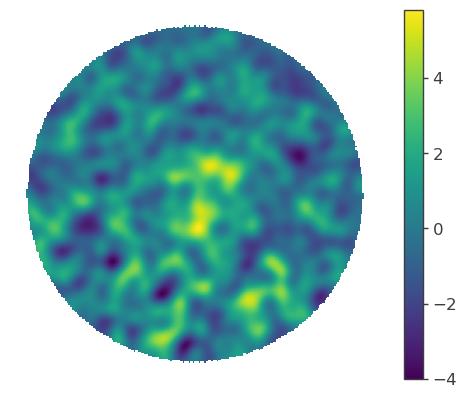

In [2]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

maptree = "../../data/20210305_20230731_ihep_goodlist.root"
response = "../../data/DR_ihep_MK2.root"

region_name="J0248"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_J0248, dec_J0248 = 42.38, 60.37
ra_LSI61303,dec_LSI61303=40.14166666666666,61.25694444444444

ra1,dec1=ra_J0248, dec_J0248
ra2,dec2=ra_LSI61303,dec_LSI61303

data_radius = 6.0
model_radius = 8.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [15]:
Modelname="0248_test"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
J0248 = my.setsorce("J0248",ra1,dec1,sigma=0.8, #sf=True,raf=True,decf=True,
                indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
                fitrange=0.5,sb=(0,3))

# J0248 = my.setsorce("J0248",ra1,dec1, #raf=True,decf=True,
#                 indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
#                 fitrange=1.5,
#                 rdiff0=0.9, rdiff0b=(0.3,5), delta=1./3., deltaf=True, deltab=(0.1,1.1), uratio = 1.12, uratiof=True, #rdiff0f=True,
#                 spat="Diffusion")

# J0248 = setsorce("J0248",ra1,dec1, #raf=True,decf=True,
#                 indexb=(-4,-1),kb=(1e-14, 1e-12),pf=True,#indexf=True,
#                 fitrange=2.5,
#                 rdiff0=0.9, rdiff0b=(0.3,5), delta=1./3., deltaf=True, deltab=(0.1,1.1), #uratio = 1.12, uratiof=True, #, rdiff0f=True
#                 b=3, bb=(0.01,10), bf=True, incl=0, inclf=False, inclb=(-90,0), elongation=10, elongationf=True, elongationb=(0.1,200),
#                 spat="Diffusion")

LSI61303 = my.setsorce("LSI61303",ra2,dec2, fitrange=0.5, #raf=True,decf=True,
                indexb=(-4,-1),pf=True, kb=(1e-15, 1e-12),#indexf=True,
                )
pt2 = my.setsorce("pt2",38.85,56.59, fitrange=1,#raf=True,decf=True,
                indexb=(-4,-1),pf=True, kb=(1e-15, 1e-12),#indexf=True,
                )

Diffuse = my.set_diffusebkg(
                K = 3.3e-13, index = -2.3,
                Kf=False, indexf=False
                )

lm = Model(J0248, LSI61303, pt2, Diffuse) #,Diffuse , pt1, pt2, pt3

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     2
Extended sources  2
Particle sources  0

Free parameters (13):
--------------------

                                           value  min_value  max_value   
J0248.Gaussian_on_sphere.lon0              42.38      41.88      42.88  \
J0248.Gaussian_on_sphere.lat0              60.37      59.87      60.87   
J0248.Gaussian_on_sphere.sigma               0.8        0.0        3.0   
J0248.spectrum.main.Powerlaw.K               0.0        0.0        0.0   
J0248.spectrum.main.Powerlaw.index          -2.6       -4.0       -1.0   
LSI61303.position.ra                   40.141667  39.641667  40.641667   
LSI61303.position.dec                  61.256944  60.756944  61.756944   
LSI61303.spectrum.main.Powerlaw.K            0.0        0.0        0.0   
LSI61303.spectrum.main.Powerlaw.index       -2.6       -4.0       -1.0   
pt2.position.ra                            38.85      37.85      39.85   
pt2.position.dec                           56.59      55.59      57.59   
pt2.spectrum.main.Powerlaw.K                 0.0        0.0        0.0   
pt2.spectrum.main.Powerlaw.index            -2.6       -4.0       -1.0   

                                                 unit  
J0248.Gaussian_on_sphere.lon0                     deg  
J0248.Gaussian_on_sphere.lat0                     deg  
J0248.Gaussian_on_sphere.sigma                    deg  
J0248.spectrum.main.Powerlaw.K         keV-1 s-1 cm-2  
J0248.spectrum.main.Powerlaw.index                     
LSI61303.position.ra                              deg  
LSI61303.position.dec                             deg  
LSI61303.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
LSI61303.spectrum.main.Powerlaw.index                  
pt2.position.ra                                   deg  
pt2.position.dec                                  deg  
pt2.spectrum.main.Powerlaw.K           keV-1 s-1 cm-2  
pt2.spectrum.main.Powerlaw.index                       

Fixed parameters (9):
---------------------

                                                                                  value   
J0248.spectrum.main.Powerlaw.piv                                           3000000000.0  \
LSI61303.spectrum.main.Powerlaw.piv                                        3000000000.0   
pt2.spectrum.main.Powerlaw.piv                                             3000000000.0   
Diffuse.SpatialTemplate_2D.K                                                        1.0   
Diffuse.SpatialTemplate_2D.hash       6997901705261540934763183943502934393086676068...   
Diffuse.SpatialTemplate_2D.ihdu                                                     0.0   
Diffuse.spectrum.main.Powerlaw.K                                                    0.0   
Diffuse.spectrum.main.Powerlaw.piv                                         3000000000.0   
Diffuse.spectrum.main.Powerlaw.index                                               -2.3   

                                     min_value max_value            unit  
J0248.spectrum.main.Powerlaw.piv          None      None             keV  
LSI61303.spectrum.main.Powerlaw.piv       None      None             keV  
pt2.spectrum.main.Powerlaw.piv            None      None             keV  
Diffuse.SpatialTemplate_2D.K              None      None           deg-2  
Diffuse.SpatialTemplate_2D.hash           None      None                  
Diffuse.SpatialTemplate_2D.ihdu            0.0      None                  
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0  keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.piv        None      None             keV  
Diffuse.spectrum.main.Powerlaw.index      -4.0      -1.0                  

Properties (2):
--------------------

                                                                        value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/J0248_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                         icrs   

                                 

21:14:04 INFO      Considering 15 dec bins for extended source J0248                ]8;id=871445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=779754;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.258                       ]8;id=155676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=659423;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=699755;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=639455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=577453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=696185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

21:14:05 INFO      Considering 15 dec bins for extended source J0248                ]8;id=527359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=589082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.370                       ]8;id=955291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=875271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=857584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=648974;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=760082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=740092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=889506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=523027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=391549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

21:21:13 ERROR     Current minimum stored after fit (47844.160946076474) and current        ]8;id=954033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=894428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#365\365]8;;\
                  (47844.161448600105) do not correspond!                                                          

Best fit values:

,result,unit
parameter,,
J0248.Gaussian_on_sphere.lon0,(4.222 +/- 0.009) x 10,deg
J0248.Gaussian_on_sphere.lat0,(6.026 +/- 0.030) x 10,deg
J0248.Gaussian_on_sphere.sigma,(4.4 +/- 1.0) x 10^-1,deg
J0248.spectrum.main.Powerlaw.K,(9.3 -2.7 +4) x 10^-23,1 / (cm2 keV s)
J0248.spectrum.main.Powerlaw.index,-2.45 +/- 0.09,
LSI61303.position.ra,(4.0346 +/- 0.0034) x 10,deg
LSI61303.position.dec,(6.1216 +/- 0.0013) x 10,deg
LSI61303.spectrum.main.Powerlaw.K,(6.06 -0.23 +0.24) x 10^-23,1 / (cm2 keV s)
LSI61303.spectrum.main.Powerlaw.index,-2.859 +/- 0.027,


Correlation matrix:

1.00,0.25,-0.34,-0.37,0.25,-0.01,-0.01,0.02,0.01,-0.02,0.00,0.00,0.00
0.25,1.00,-0.92,-0.89,0.53,-0.04,0.00,-0.01,-0.01,0.01,0.00,0.00,-0.00
-0.34,-0.92,1.00,0.76,-0.48,0.03,-0.00,0.01,0.01,-0.02,-0.00,-0.00,0.00
-0.37,-0.89,0.76,1.00,-0.80,0.03,0.00,-0.00,0.01,-0.01,-0.00,-0.00,0.00
0.25,0.53,-0.48,-0.80,1.00,-0.02,-0.00,0.01,-0.01,-0.00,0.00,0.00,0.00
-0.01,-0.04,0.03,0.03,-0.02,1.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
-0.01,0.00,-0.00,0.00,-0.00,-0.00,1.00,-0.02,-0.01,0.00,-0.00,0.00,-0.00
0.02,-0.01,0.01,-0.00,0.01,-0.00,-0.02,1.00,-0.21,-0.00,0.00,0.00,0.00
0.01,-0.01,0.01,0.01,-0.01,-0.00,-0.01,-0.21,1.00,-0.00,0.00,-0.00,0.00
-0.02,0.01,-0.02,-0.01,-0.00,0.00,0.00,-0.00,-0.00,1.00,0.01,-0.01,-0.02
0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,1.00,0.00,-0.02


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,47844.161449
total,47844.161449


Values of statistical measures:

,statistical measures
AIC,95714.324657
BIC,95847.437751


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
J0248.Gaussian_on_sphere.lon0,4.221721e+01,-8.094358e-02,8.935469e-02,8.514913e-02,deg
J0248.Gaussian_on_sphere.lat0,6.025943e+01,-2.076169e-01,2.971869e-01,2.524019e-01,deg
J0248.Gaussian_on_sphere.sigma,4.363035e-01,-9.448895e-02,6.831593e-02,8.140244e-02,deg
J0248.spectrum.main.Powerlaw.K,9.280574e-23,-2.661746e-23,2.608215e-23,2.634980e-23,1 / (cm2 keV s)
J0248.spectrum.main.Powerlaw.index,-2.445481e+00,-7.514783e-02,8.943053e-02,8.228918e-02,
LSI61303.position.ra,4.034624e+01,-3.367616e-02,3.385865e-02,3.376741e-02,deg
LSI61303.position.dec,6.121592e+01,-1.335344e-02,1.253645e-02,1.294494e-02,deg
LSI61303.spectrum.main.Powerlaw.K,6.064497e-23,-2.256725e-24,2.333473e-24,2.295099e-24,1 / (cm2 keV s)
LSI61303.spectrum.main.Powerlaw.index,-2.859031e+00,-2.734131e-02,2.657857e-02,2.695994e-02,
pt2.position.ra,3.847460e+01,-2.800128e-02,2.875713e-02,2.837920e-02,deg


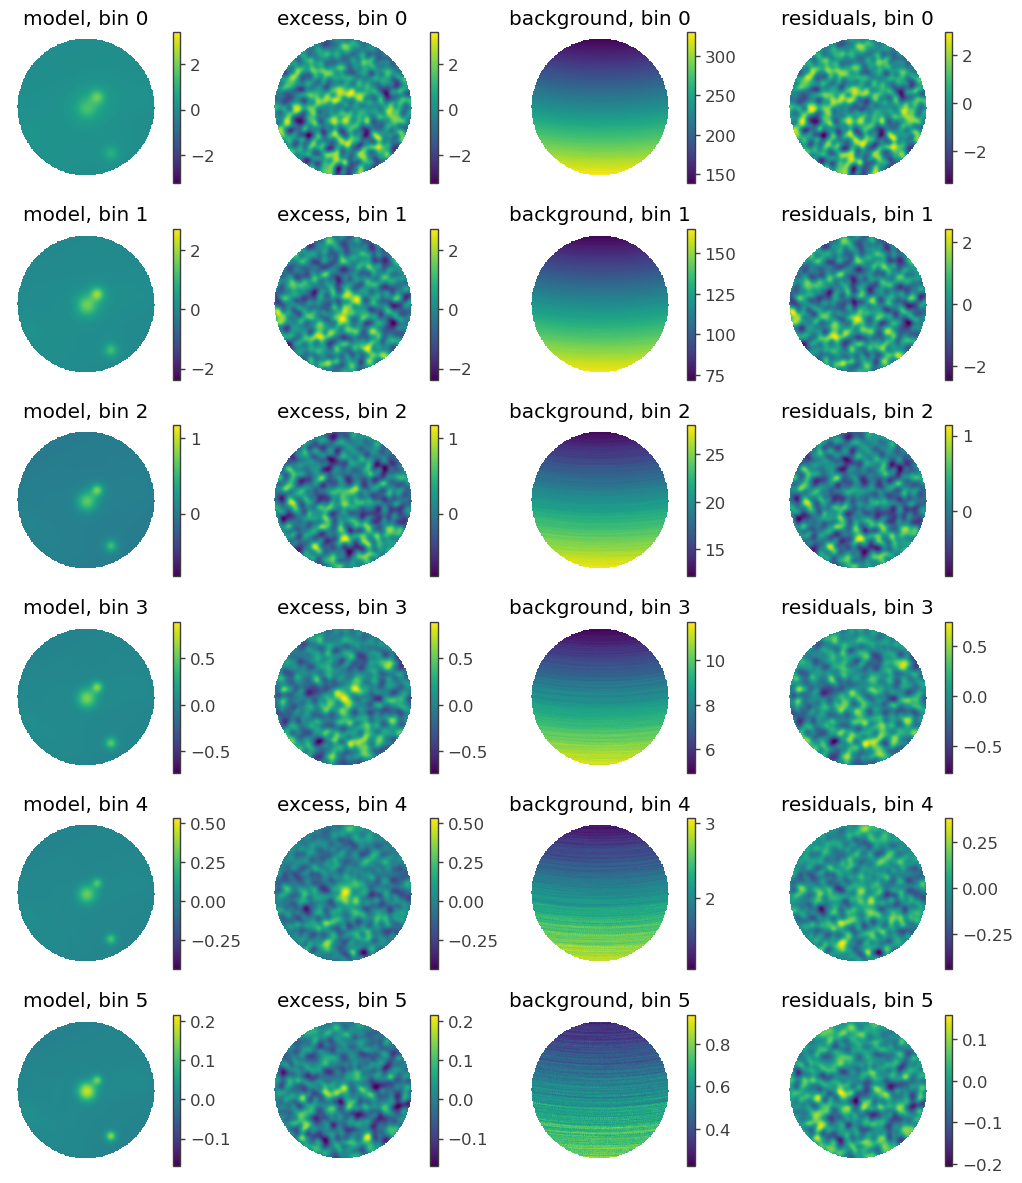

In [16]:
# Attempt the fitting; it will take approximately ten minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [17]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["J0248", "LSI61303", "pt2"] # A list put the source that you want to compute TS
TS = {}
for sc in tqdm(TSlist):
    TS[sc]=result[0].compute_TS(sc,result[1][1]).values[0][2]
llh = WCDA.get_log_like()
TS_all = WCDA.cal_TS_all()
TS["TS_all"] = TS_all
TS["-log(likelihood)"] = -llh
TSresults = pd.DataFrame([TS])
TSresults.to_csv(f'../res/{region_name}/{Modelname}/Results.txt', sep='\t', mode='a', index=False)
TSresults

21:21:25 INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=852109;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=445746;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=989794;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=276360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=208601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=376487;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=38325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=462843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

21:22:49 INFO      Considering 15 dec bins for extended source J0248                ]8;id=253944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=713399;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=657689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=734161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=61715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=500450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=799597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=711356;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

21:22:50 INFO      Considering 15 dec bins for extended source J0248                ]8;id=197781;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=302842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=133774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=738911;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=190085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=592664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=213173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=37418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=968722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=236861;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=899743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=82727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

21:24:21 INFO      Considering 15 dec bins for extended source J0248                ]8;id=40322;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=388306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=226497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=245610;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=661595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=181918;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=136820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=188425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

21:24:22 INFO      Considering 15 dec bins for extended source J0248                ]8;id=736813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=613820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=269797;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=14853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=334128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=621481;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=571873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=538680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=584278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=784842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=558202;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=750573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

21:25:05 INFO      Considering 15 dec bins for extended source J0248                ]8;id=714181;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=24939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=651187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=111605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=406464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=531017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=127758;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336030;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

100%|██████████| 3/3 [03:40<00:00, 73.34s/it]


,J0248,LSI61303,pt2,TS_all,-log(likelihood)
0,63.071624,28.590191,23.452543,144.075327,47844.161449


TeVCat:  1 40.14166666666666 61.25694444444444 LS I +61 303
PSR:  1 33.98595833333333 62.30927777777777 J0215+6218
PSR:  2 40.645833333333336 62.947222222222216 J0242+62
PSR:  3 40.75 60.45 J0243+6027
PSR:  4 42.07758333333333 60.35963888888889 J0248+6021
SNR:  1 34.41666666666666 62.75 G132.7+01.3


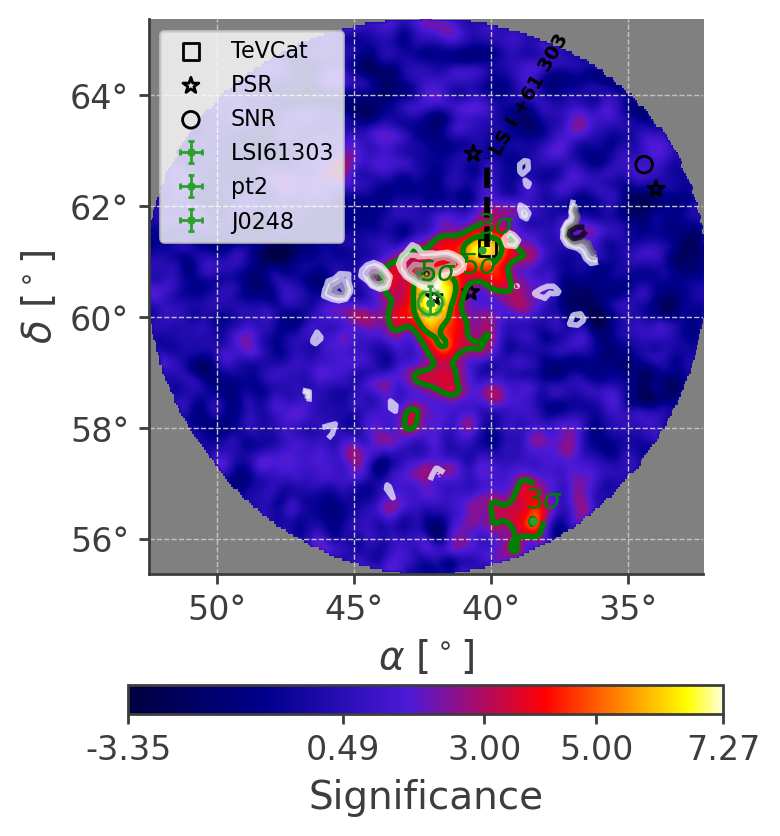

In [18]:
%matplotlib inline
sources = my.get_sources(lm,result)

sources.pop("Diffuse")
# map2, skymapHeader = hp.read_map("../../data/signif_gcd_new_nHit006_0.30.fits.gz_other.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("../../data/sigts_J0248.fits.gz",h=True)
map2, skymapHeader = hp.read_map("../../data/sigts_siglist_J0248_20210305-20230731.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("../../data/signif_20210305_20230731_ihep_goodlist_nHit006_0.29.fits.gz.fits.gz",h=True)

radx= 20; rady = 20
ymax = dec1+rady/2
ymin = dec1-rady/2
xmin = ra1-radx/2
xmax = ra1+radx/2
# ra1, dec1 = 83.63,22.02
ra1, dec1 =42.38, 60.37
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=10, contours=[3,5],save=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"4FGL","^","black",60,label="4FGL",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"QSO",">","black",60,label="QSO",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"Simbad",".","black",90,fontsize=3,label="AGN",stype="AGN",textlabel=False)
plt.legend()

In [58]:
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]
maps = my.getmap(WCDA,roi,"J0248",pta=[0,0], exta=[0,0], # means i only want res of J0248
                #    stack=[1.000927,1.000286,1.002131,1.005977,1.002093,1.004078],
                   stack=[0, 0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 34470/34470 [00:00<00:00, 120766.79it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 86339.25it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 70087.83it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 86351.11it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 86399.51it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 62753.23it/s]


Mask all


100%|██████████| 34470/34470 [00:00<00:00, 503398.85it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


************************
[ 8.60276274e+02 -1.64607331e-01  1.06712980e+00]
************************
max Significance= 3.2
TeVCat:  1 31.379166666666666 64.85 3C 58
TeVCat:  2 40.14166666666666 61.25694444444444 LS I +61 303
PSR:  1 31.408 64.82813888888889 J0205+6449
PSR:  2 33.98595833333333 62.30927777777777 J0215+6218
PSR:  3 40.645833333333336 62.947222222222216 J0242+62
PSR:  4 40.75 60.45 J0243+6027
PSR:  5 42.07758333333333 60.35963888888889 J0248+6021
PSR:  6 53.24737499999999 54.57877777777778 J0332+5434
SNR:  1 31.42083333333333 64.81666666666666 G130.7+03.1
SNR:  2 34.41666666666666 62.75 G132.7+01.3


compute ring: 100%|██████████| 19/19 [00:00<00:00, 145688.80it/s]


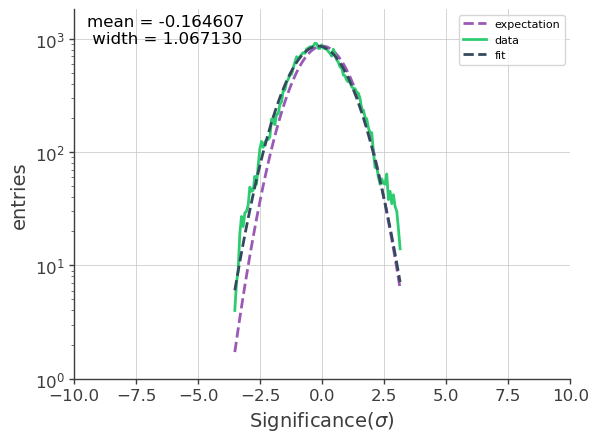

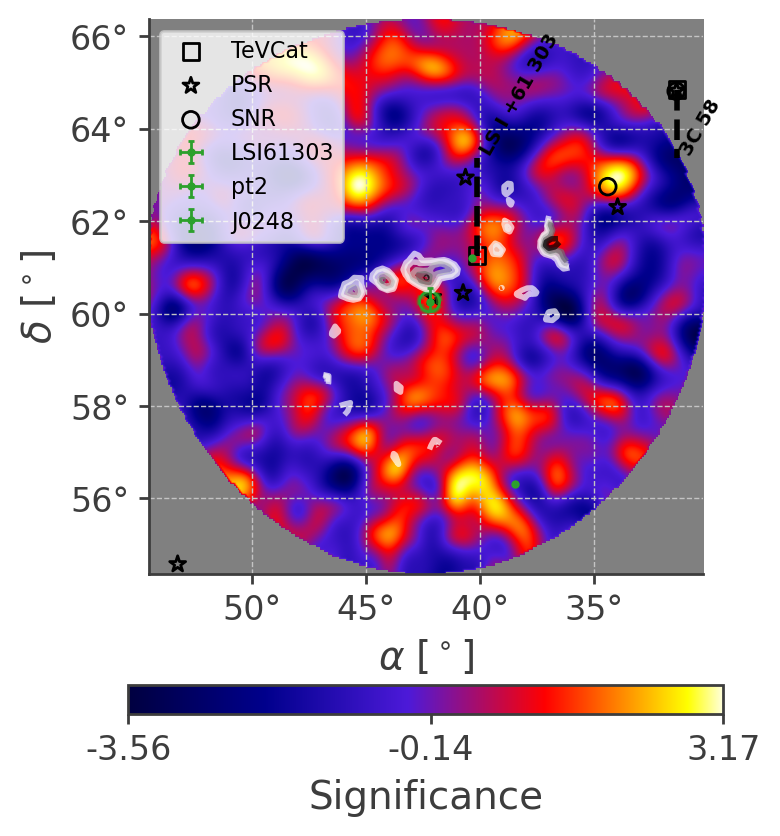

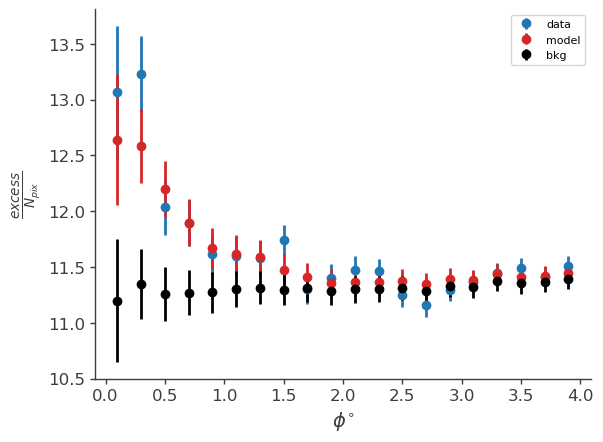

In [82]:
%matplotlib inline
res=True
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="J0248")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=12, contours=[100],save=True,savename=saven)
psfdata = my.Draw_lateral_distribution(maps[-1], ra1, dec1, 20, 0.2, True)

In [21]:
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, ra1, dec1, "J0248resall_DGE_cdiff",[0,0],[0,0])

processing at nHit0 0


100%|██████████| 95589/95589 [00:02<00:00, 34241.25it/s]


processing at nHit0 1


100%|██████████| 95589/95589 [00:02<00:00, 34703.82it/s]


processing at nHit0 2


100%|██████████| 95589/95589 [00:02<00:00, 33468.21it/s]


processing at nHit0 3


100%|██████████| 95589/95589 [00:02<00:00, 34933.96it/s]


processing at nHit0 4


100%|██████████| 95589/95589 [00:02<00:00, 33047.37it/s]


processing at nHit0 5


100%|██████████| 95589/95589 [00:02<00:00, 34925.59it/s]


In [22]:
Flux_WCDA = my.getdatapoint(WCDA, lm, maptree, response, roi, "J0248")
Flux_WCDA2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "LSI61303")
Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "pt2")
# Flux_WCDA4 = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse")


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:30 INFO      Considering 15 dec bins for extended source J0248                ]8;id=224906;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=359073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=112772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=333342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=859878;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=521873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=907542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=303799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=25433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=178365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=826690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=990654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(4.0 -2.8 +9) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.018356
total,8577.018356


Values of statistical measures:

,statistical measures
AIC,17156.036731
BIC,17166.276315



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:33 INFO      Considering 15 dec bins for extended source J0248                ]8;id=359774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=438560;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=73336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=992815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=497884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=786723;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=275303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=484890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=410074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=379788;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=687693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=951184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(6.4 -2.5 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8467.118798
total,8467.118798


Values of statistical measures:

,statistical measures
AIC,16936.237614
BIC,16946.477199



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:35 INFO      Considering 15 dec bins for extended source J0248                ]8;id=236426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=92579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=764610;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=413068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=551014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=323903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=45877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=128211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=681343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=225824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=319703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=123888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.04 -0.28 +0.4) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8141.939024
total,8141.939024


Values of statistical measures:

,statistical measures
AIC,16285.878067
BIC,16296.117652



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:37 INFO      Considering 15 dec bins for extended source J0248                ]8;id=757494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=554155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=283727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=843875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=813937;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=379690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=231023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=244343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=689604;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=355049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=957444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=453644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.21 -0.24 +0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8197.162658
total,8197.162658


Values of statistical measures:

,statistical measures
AIC,16396.325336
BIC,16406.564920



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:39 INFO      Considering 15 dec bins for extended source J0248                ]8;id=364566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=767626;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=864524;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=267854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=563769;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=824562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=709161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=221134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=577215;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=140722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=599278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=848360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(1.43 -0.24 +0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7460.722328
total,7460.722328


Values of statistical measures:

,statistical measures
AIC,14923.444676
BIC,14933.684261



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:41 INFO      Considering 15 dec bins for extended source J0248                ]8;id=607085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=54872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=249931;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=442695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=913416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=901066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=561776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=845986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=544643;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=786900;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=387027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=4314;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J0248.spectrum.main.Powerlaw.K,(4.9 -1.8 +2.8) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6994.842582
total,6994.842582


Values of statistical measures:

,statistical measures
AIC,13991.685183
BIC,14001.924768



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:43 INFO      Considering 15 dec bins for extended source J0248                ]8;id=910121;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=244650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=867334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=836540;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=611447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=473730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=746078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=342224;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=528978;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=720991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=372045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(5.7 -2.5 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.625654
total,8577.625654


Values of statistical measures:

,statistical measures
AIC,17157.251327
BIC,17167.490911



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:45 INFO      Considering 15 dec bins for extended source J0248                ]8;id=950903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=66594;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=394943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=784458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=218378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=451068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=941777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=179493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=834006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73957;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=415701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=68008;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(3.2 -1.6 +3.3) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8466.7378
total,8466.7378


Values of statistical measures:

,statistical measures
AIC,16935.475619
BIC,16945.715204



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:47 INFO      Considering 15 dec bins for extended source J0248                ]8;id=600087;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=957291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=500068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=226718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=405112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=996832;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=72375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=848761;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=892630;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=892734;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=456944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=55153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(7.7 -2.2 +3.0) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8141.775292
total,8141.775292


Values of statistical measures:

,statistical measures
AIC,16285.550604
BIC,16295.790189



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:49 INFO      Considering 15 dec bins for extended source J0248                ]8;id=561277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=9877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=808291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=272636;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=994963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=836288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=55834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=930879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=833800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=53274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=79939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=545279;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(9.1 -1.9 +2.5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8196.720303
total,8196.720303


Values of statistical measures:

,statistical measures
AIC,16395.440626
BIC,16405.680211



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:51 INFO      Considering 15 dec bins for extended source J0248                ]8;id=622872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=672407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=597142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=307407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=802362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=58383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=17861;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=613048;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=299031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=781156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=107333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(5.6 -1.9 +3.0) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7462.602911
total,7462.602911


Values of statistical measures:

,statistical measures
AIC,14927.205841
BIC,14937.445426



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:53 INFO      Considering 15 dec bins for extended source J0248                ]8;id=512167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=67364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=813885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=69753;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=903164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=331235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=212843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=632669;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=149516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=317954;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=945770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=721282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
LSI61303.spectrum.main.Powerlaw.K,(3.6 -1.8 +4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6996.184047
total,6996.184047


Values of statistical measures:

,statistical measures
AIC,13994.368112
BIC,14004.607697



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:55 INFO      Considering 15 dec bins for extended source J0248                ]8;id=175601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=333919;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=488992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=430827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=470094;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=205989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=588629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=665400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=391378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=803893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=818030;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=513630;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(2.8 -1.8 +5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8577.630374
total,8577.630374


Values of statistical measures:

,statistical measures
AIC,17157.260767
BIC,17167.500352



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:57 INFO      Considering 15 dec bins for extended source J0248                ]8;id=121735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=753942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=279104;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=164731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=59253;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=822528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=550031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=736266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=98292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=329624;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=236187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=968317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.9 -1.4 +2.3) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8467.275448
total,8467.275448


Values of statistical measures:

,statistical measures
AIC,16936.550916
BIC,16946.790501



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:31:59 INFO      Considering 15 dec bins for extended source J0248                ]8;id=110550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=546302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=58727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=889597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=426107;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=919980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=623753;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98859;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=800167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=68862;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=522511;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=132380;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.1 -1.2 +2.1) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8141.949871
total,8141.949871


Values of statistical measures:

,statistical measures
AIC,16285.899761
BIC,16296.139346



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:32:01 INFO      Considering 15 dec bins for extended source J0248                ]8;id=681356;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=535996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=861602;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=54319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=601547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=721933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=420706;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=275143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=565893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=505855;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=723173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(1.1 -0.7 +2.0) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8196.982602
total,8196.982602


Values of statistical measures:

,statistical measures
AIC,16395.965224
BIC,16406.204808



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:32:02 INFO      Considering 15 dec bins for extended source J0248                ]8;id=827856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=963238;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=52120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=814710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=242961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=569691;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=857016;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=14366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=210614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=127064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=115159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=476131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(2.5 -0.9 +1.4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7462.618111
total,7462.618111


Values of statistical measures:

,statistical measures
AIC,14927.236240
BIC,14937.475825



WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



21:32:04 INFO      Considering 15 dec bins for extended source J0248                ]8;id=729471;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=549027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 60.259                       ]8;id=449975;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=168709;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=509771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=287664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 59.671                       ]8;id=145290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=152730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=742001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=429694;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=562951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=449293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
pt2.spectrum.main.Powerlaw.K,(3.2 -1.0 +1.4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,6996.521991
total,6996.521991


Values of statistical measures:

,statistical measures
AIC,13995.044002
BIC,14005.283586


processing MLE analyses:   0%|          | 0/3 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

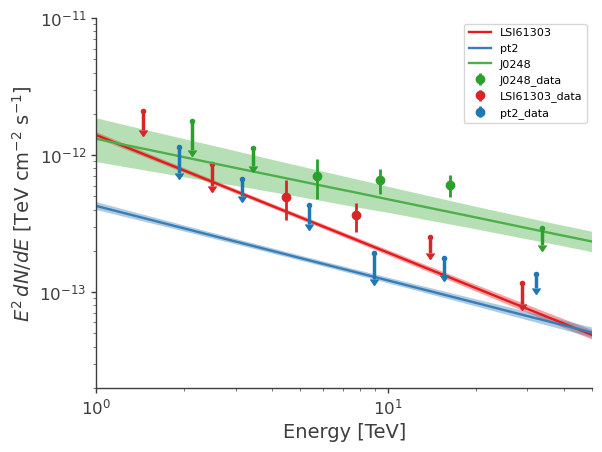

In [25]:
%matplotlib inline
x_Max=50.
x_Min=1
y_Min=0.2e-13
y_Max=1e-11
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["J0248","LSI61303","pt2"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"J0248_data","tab:green")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2, "LSI61303_data", "tab:red")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3, "pt2_data", "tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA4, "Diffuse_data", "tab:green")

# e_J0248=np.linspace(x_Min,x_Max,500)
# flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
# plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science')

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')